<a href="https://colab.research.google.com/github/yogeshsupe/-scraplinks/blob/master/193100059_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2  ME 781  (Data Scale)

### Perform the following tasks in sequence:

1. Create a list of 5 open data sets available for machine learning along with their links for each of the three Data Types (Discrete data Type, Sequential (temporal) data Type and Spatial data Type)


2. Write a python code to input a dataset (csv file) of Discrete data type, automatically identify and print the

    a. Number of attributes and number of entries
    
    b. Data scale of each attribute
    
    c. Data value of each attribute


3.      Write a python code to perform statistics on each data column based on its data scale.


4.      Can we use a box plot for visualizing ordinal data? (Yes/No). Explain why. 

![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)


5.      Write a python code to visualize data in the csv file (a generalized method depending upon data scale) 

    Assignment instructions:
    1. Naming convention: Please name your colab files as rollnumber_A2.ipynb. 
    2. Learn how to use markdown to add texts in colab to make your code interactive and understandable. 
    3. After completion of your assignment download the file as .ipynb and submit itusing Teams assignment tab.

  ###  We have a software to check plagiarism in code, if anyone found copying the code, strict action will be taken against such students and can also be given FR grade directly.
    
  We  expect  you  to  upload  colab  notebooks  when  you  are  required  to  turn  your  programming assignments.  Please  make  sure  that  you  provide  enough  comments  in  the  code  for  the TAs to understand 
       

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as statis
import statistics

### 1. List of 5 open data sets

The following datasets used in the notebook to form list.

**Discrete data**
1. Iris dataset: Predict flower type of the Iris plant species from length, width of sepal and petal.
2. Student Dataset given as example in A2.
**Sequential (temporal) Data**
3. Molecular Biology (Splice-junction Gene Sequences) Data Set

4. Hill-Valley Data Set: Bump and Dip in terrain mark over 100 linear points.
**Spatial Data**
5. Cloud Data Set: The data sets we propose to analyse are constituted of 1024 vectors, each vector includes 10 parameters, data obtained from 512*512 AVHRR images.

In [ ]:
## Paste the URLs of open datasets here and add comments describing the dataset

url1 = "https://www.mldata.io/download-csv-weka/iris/"                                                                                                               # Iris

url2 = "https://drive.google.com/uc?id=1k6QC60pT8M_cYduGjsEn1iN_3KyxT-s1&export=download"                                                                            # Student Example Data Set

url3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data'                                      # Molecular-biology/splice-junction-gene-sequences

url4 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hill-valley/Hill_Valley_without_noise_Testing.data'                                                # Hill_valley_data sequencial data

url5 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data'                                                                    # Spatio- Temporal data 

url = [url1, url2, url3, url4, url5]

Here, first 2 datasets are of Discrete type. So, we can choose any url among these two dataset to test the generalization of following program.
### **Input**

In [ ]:
dataset = pd.read_csv(url2)

### 2.   Write a python code to input a dataset (csv file) of Discrete datatype, automatically identify and print the

    a. Number of attributes and number of data points
    
    b. Data scale of each attribute
    
    c. Data value of each attribute

In [ ]:
def data_description(filename):
   
  r = len(filename)                                                             #no. of entries = no. of rows
  c = len(list(filename))                                                       #no. of attributes = no. of columns
  print('This dataset contains',r,'entries, each with',c,'attributes','\n')
  rd = filename
  for j in range (c):
    col = rd.columns[j]
    s = pd.unique(rd[col])                                                      # Finding number of Categorical variables 
    l = len(s)
    
    if rd.dtypes[j] == 'object':                                                
      ds = 'nominal'
      dv = 'discrete'
     
    elif rd.dtypes[j] == 'int64':
      dv = 'discrete'
      for a in range (l):
        if l == 5:
         if s[a] > 6:                                                           # Assumption that ordinal data is usually expressed as rating (1,2,3,4,5)
           pass
         else:  
          ds = 'ordinal'
        elif l < 8:                                                             # limiting the number of categories for the categorical variables to 8 for interval data scale
         ds = 'interval'
        else:
         ds = 'ratio'

    else:
       dv = 'continuous'                                                        # For float data type, If categories more than 8
       if len(s) < 8:
          ds = 'interval'
       else:
        ds = 'ratio'
        
    print(j,rd.columns[j],':',ds,',',dv)

### **Output**

In [ ]:
data_description(dataset)

This dataset contains 649 entries, each with 6 attributes 

0 gender : nominal , discrete
1 age : ratio , discrete
2 health_rating : ordinal , discrete
3 StudentIQ : ratio , discrete
4 no_of_courses : ratio , discrete
5 Marks : ratio , continuous


    Output must similar to this:
    
    This dataset contains 649 entries, each with 6 attributes

    0 gender : nominal, discrete
    1 age : ratio, discrete
    2 health_rating : ordinal, discrete
    3 StudentIQ : ratio, discrete
    4 no_of_courses : ratio, discrete
    5 Marks : ratio, continuous


### 3. Write a python code to perform statistics on each data column based on its data scale.

In [ ]:
def stats(filename):
   
  r = len(filename)                                                             # Number of rows                                                                                                                              
  c = len(list(filename))                                                       # Number of columns
                                                                                          
  rd = filename
  for j in range (c):
    col = rd.columns[j]                                                         # Finding number of Categorical variables 
    s = pd.unique(rd[col])
    l = len(s)
    
    if rd.dtypes[j] == 'object':
      ds = 'nominal'
      dv = 'discrete'
     
    elif rd.dtypes[j] == 'int64':
      dv = 'discrete'
      for a in range (l):
        #print(int(s[a]))
        if l == 5:
         if s[a] > 6:                                                           # Assumption that ordinal data is usually expressed as rating (1,2,3,4,5)
           pass
         else:  
          ds = 'ordinal'
        elif l < 8:                                                             # limiting the number of categories for the categorical variables to 8 for interval data scale
         ds = 'interval'
        else:
         ds = 'ratio'
    else:
       dv = 'continuous'
       if len(s) < 8:                                                           # For float data type, If categories more than 8
          ds = 'interval'
       else:
        ds = 'ratio'
    z = sorted(rd[col])
    print(col)
    
    if ds == 'nominal':
     count = pd.DataFrame(rd[col].value_counts())                               # Printing Mode for nominal 
     print('mode \t', rd[col].mode().iloc[0])
     print(count)
    elif ds == "ordinal":
     count = rd[col].value_counts()
     print('mode \t', rd[col].mode().iloc[0])                                   # Printing Mode for ordinal 
     print('median \t', rd[col].median())                                       # Printing Median for ordinal 
     print(count.sort_index())
    else:
     print('mode \t',rd[col].mode().iloc[0])                                    # Printing Mode                                                                                
     description = filename[col].describe()                                     #using describe function to obtain other statistical values
     description.rename(index={'50%': 'median'},inplace=True)                   #renaming 50% name with median as it is desired output
     print(description[1::])
     print('\n')
    print('\n')


### **Output**

In [ ]:
stats(dataset)

gender
mode 	 F
   gender
F     383
M     266


age
mode 	 17
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
median    17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64




health_rating
mode 	 5
median 	 4.0
1     90
2     78
3    124
4    108
5    249
Name: health_rating, dtype: int64


StudentIQ
mode 	 104
mean      100.229584
std        10.256494
min        75.000000
25%        93.000000
median    101.000000
75%       107.000000
max       131.000000
Name: StudentIQ, dtype: float64




no_of_courses
mode 	 17
mean      10.596302
std        5.714697
min        1.000000
25%        5.000000
median    11.000000
75%       16.000000
max       20.000000
Name: no_of_courses, dtype: float64




Marks
mode 	 52.81
mean      75.137257
std       14.559722
min       50.120000
25%       62.560000
median    75.120000
75%       87.670000
max       99.860000
Name: Marks, dtype: float64






### 4. Can we use a box plot for visualizing ordinal data ? (Yes/No). Explain why.


Yes.

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

Since we can find all values for ordinal dataset, we can also draw Box Plot for it. 

###   5.  Write a python code to visualize the data (a generalized method depending on data scale) 

In [ ]:
def visualize_data(filename):
            
    df1 = filename.select_dtypes([np.int64, np.float64])                        # Selecting features of type int and float for plotting graph

    for i, col in enumerate(df1.columns):
        plt.figure(i)
        
        sns.distplot(df1[col])                                                  # Seaborn distplot
        print('\n')
        plt.figure(len(df1.columns)+i)
        
        sns.countplot(x=col, data=df1)                                          # Seaborn countplot
        print('\n')



### **Output**

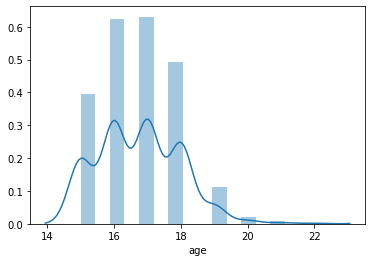

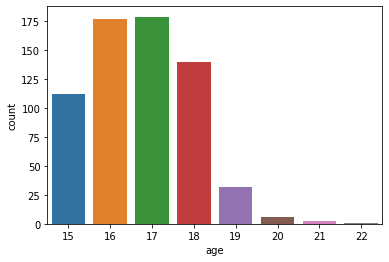

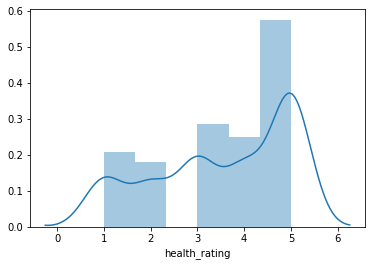

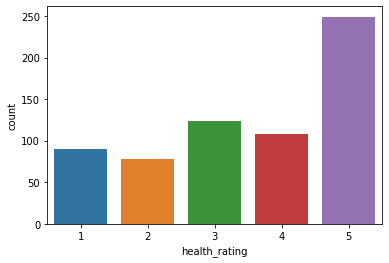

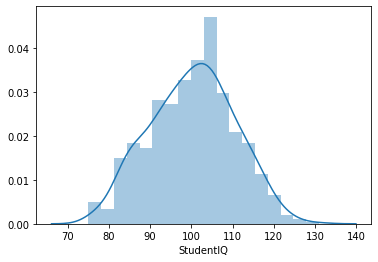

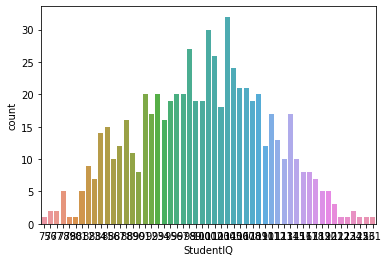

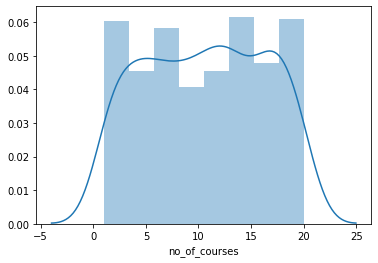

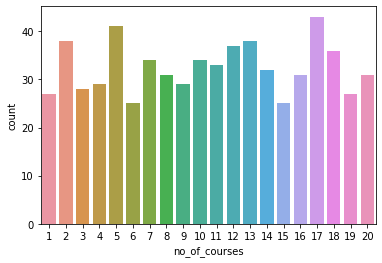

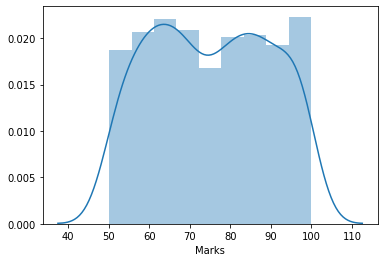

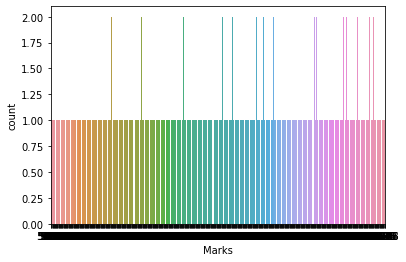

In [ ]:
visualize_data(dataset)    